In [1]:
import sys
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns 


import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import setuptools.dist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import adam_v2
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras.engine import data_adapter
from tensorflow.python.keras.callbacks import EarlyStopping


'/Users/heliamohammadi/Desktop/github/ML_Healthcare/Cardiovascular_Disease_Prediction/'

## 1. Load and Clean Data

In [2]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang','oldpeak', 'slope', 'ca', 'thal', 'num'
]
cleaveland_data = pd.read_csv('./data/cleaveland_data.csv')
cleaveland_data.shape

(303, 14)

In [3]:
cleaveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
cleaveland_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
cleaveland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
cleaveland_data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [7]:
cleaveland_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
# replace missing data with NaN
data = cleaveland_data.replace('?', np.nan)
data.dropna(inplace=True)
print(data.info())
data.isin(['?']).sum()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB
None


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Univariate Distributions

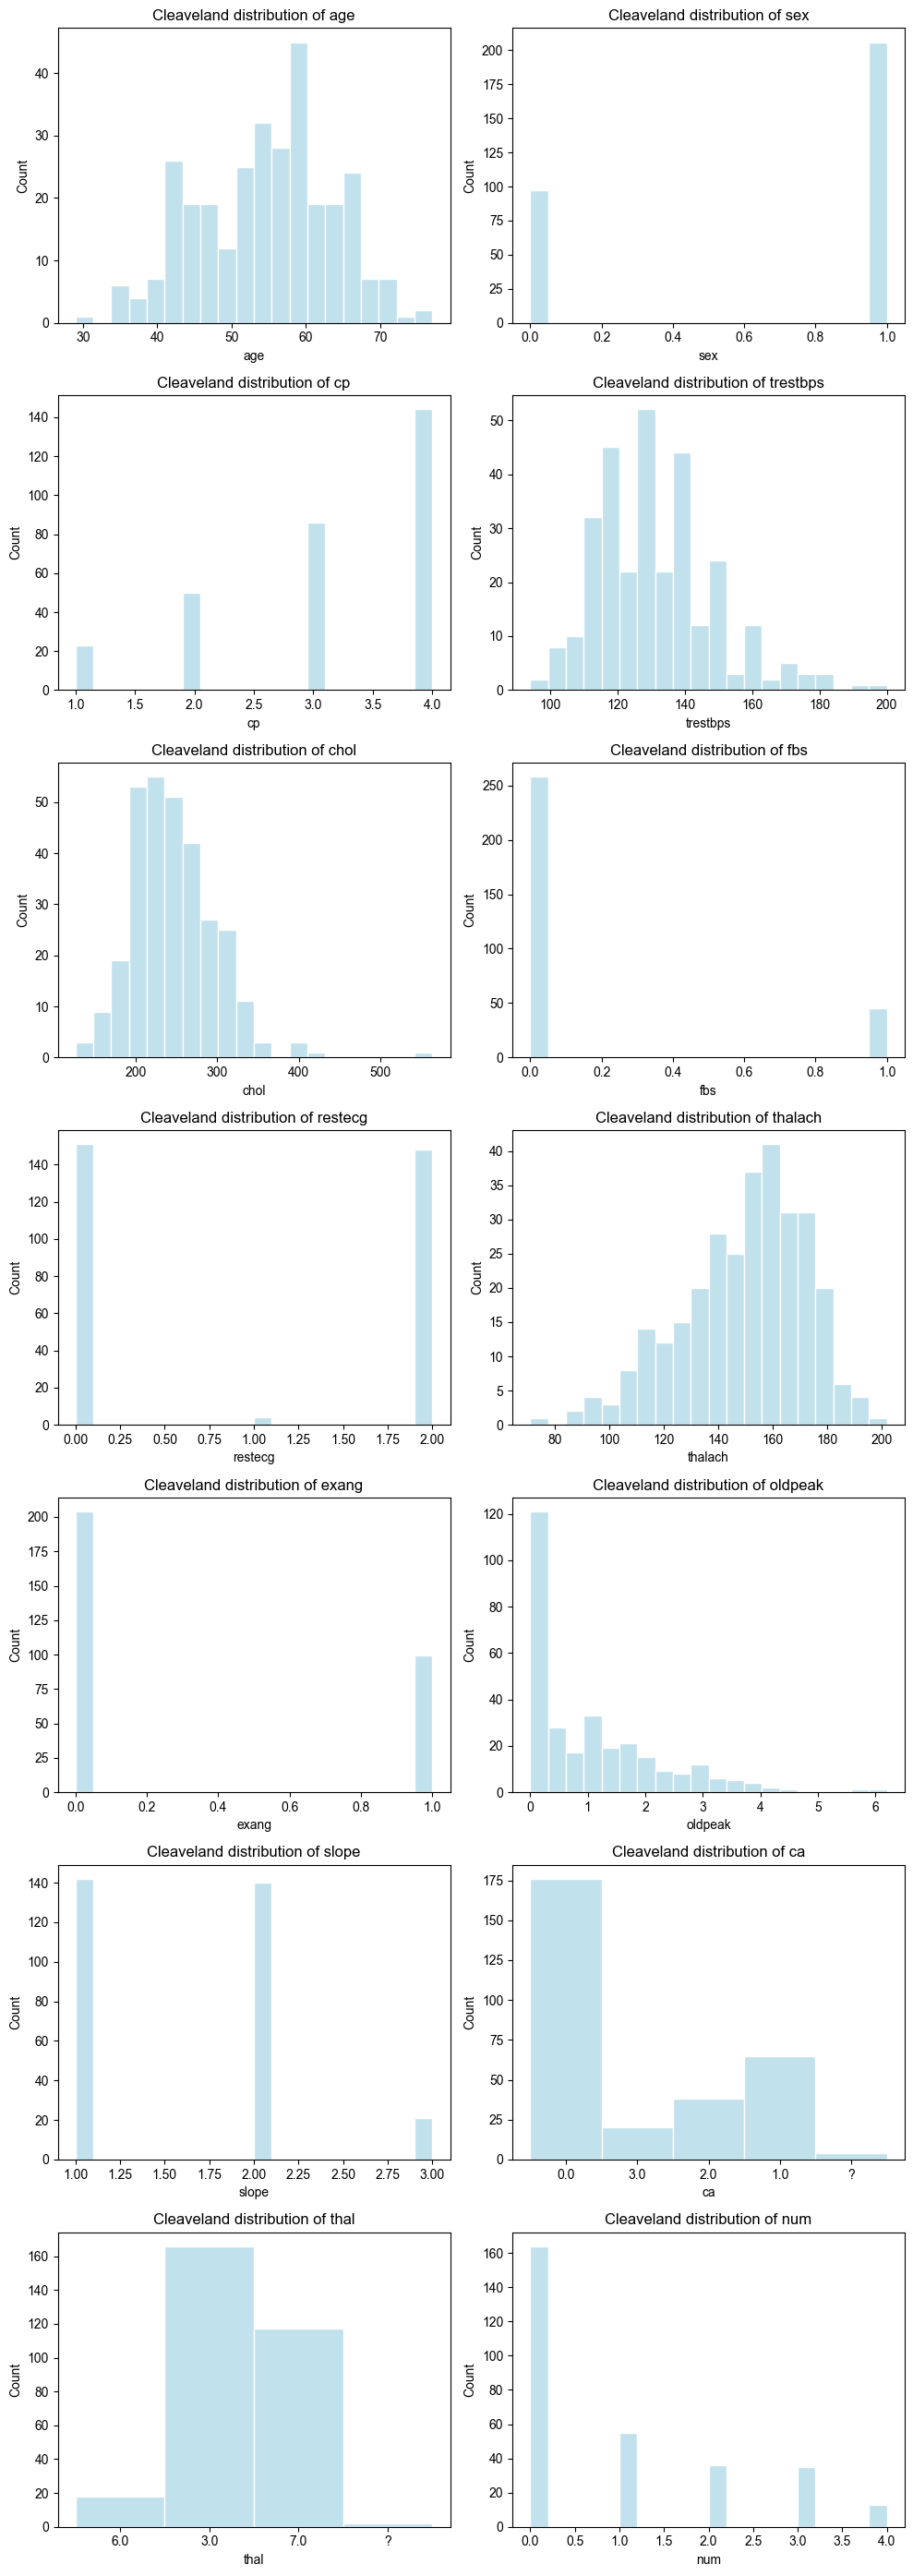

In [11]:
cleavland_columns = cleaveland_data.columns

fig, axes = plt.subplots(7, 2, figsize=(10, 28))
sns.set_style('whitegrid')
sns.set_palette('husl')

for col, ax in zip(cleavland_columns, axes.flat):
    sns.histplot(cleaveland_data[col], kde=False, bins=20, color='lightblue', ax=ax)
    ax.set_title(f'Cleaveland distribution of {col}')

plt.tight_layout()
plt.show()

### 2.2 Bivariate Analysis

/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/436191423.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'num', data = data, palette='husl')


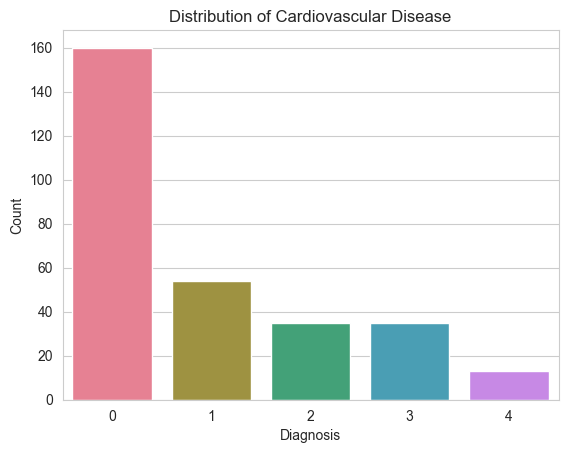

In [12]:
sns.countplot(x = 'num', data = data, palette='husl')
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

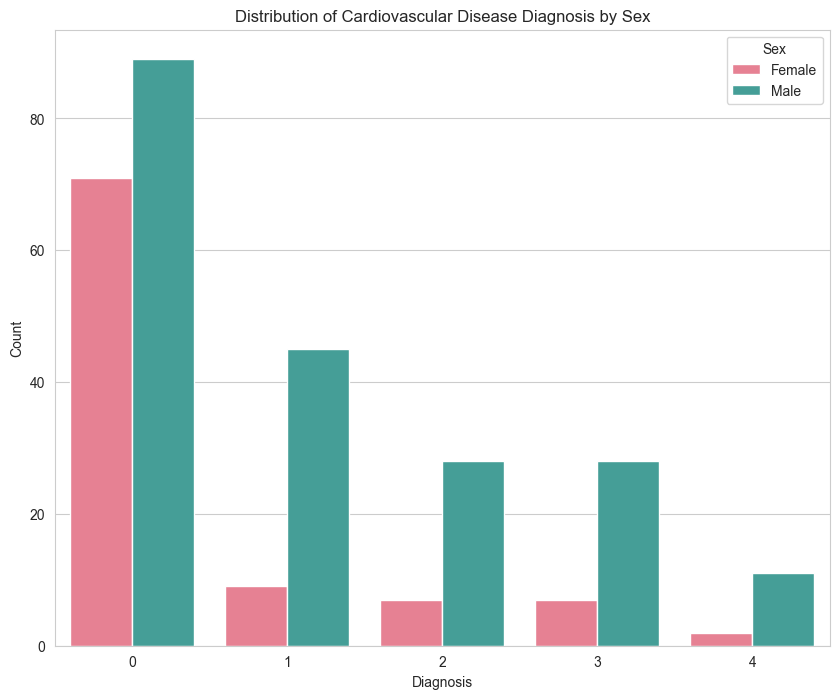

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x = 'num', hue='sex', palette='husl')

plt.title('Distribution of Cardiovascular Disease Diagnosis by Sex')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title = 'Sex', labels = ['Female', 'Male'])

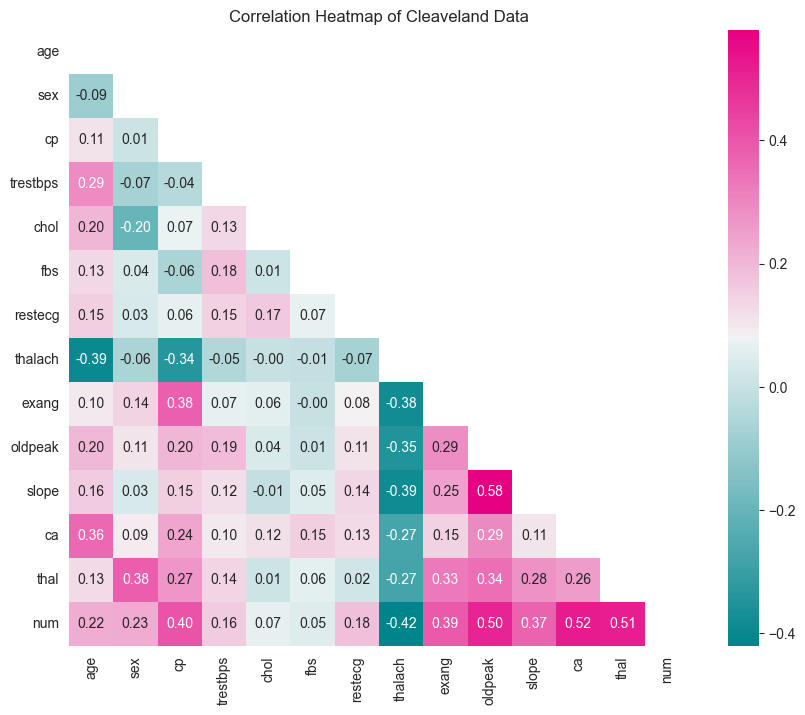

In [14]:
corr = data.corr()

sns.set_style('white')
plt.figure(figsize=(10, 8))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(200, 350, s=100, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.2f', cbar=True, mask=mask)
plt.title('Correlation Heatmap of Cleaveland Data')
plt.show()

> - **ca (0.52), thal (0.51), and slope (0.50)** have the strongest correlation with heart disease diagnosis.
>
> - **thalach (-0.42)** has a negative correlation with disease severity, indicating that lower heart rates are associated with higher disease severity. 

/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/3595359008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=data, ax=ax, palette='husl')
/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/3595359008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=data, ax=ax, palette='husl')
/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/3595359008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=data, ax=ax, palette='husl')
/var/folders/

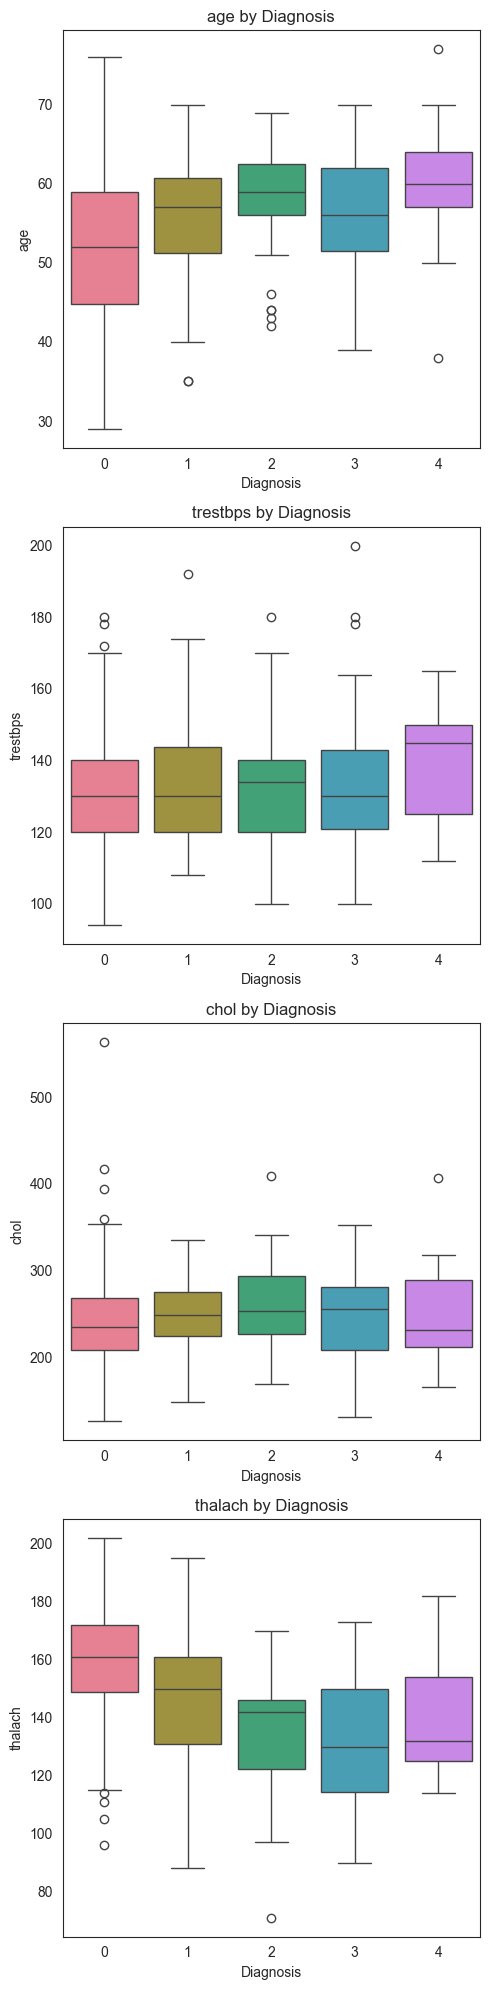

In [15]:
continious_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(4, 1, figsize=(5, 20))
sns.set_style('whitegrid')

for col, ax in zip(continious_features, axes.flat):
    sns.boxplot(x='num', y=col, data=data, ax=ax, palette='husl')
    ax.set_title(f'{col} by Diagnosis')
    ax.set_xlabel('Diagnosis')
    ax.set_ylabel(col)
    
plt.tight_layout()
plt.show()

> - Patients with more severe diagnoses tend to be older 
>
> - Maximum heart rate decreases with increasing diagnosis.

/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/301429185.py:8: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=col, data=data, hue='num', palette=pallete, ax=ax)
/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/301429185.py:8: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=col, data=data, hue='num', palette=pallete, ax=ax)
/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/301429185.py:8: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=col, data=data, hue='num', palette=pallete, ax=ax)
/var/folders/yf/vkky60557cb4p7scty7czkg40000gn/T/ipykernel_98782/301429185.py:8: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=col, data=data, hue='num', palette=pallete, ax=ax)
/var/folders/yf/vkky6055

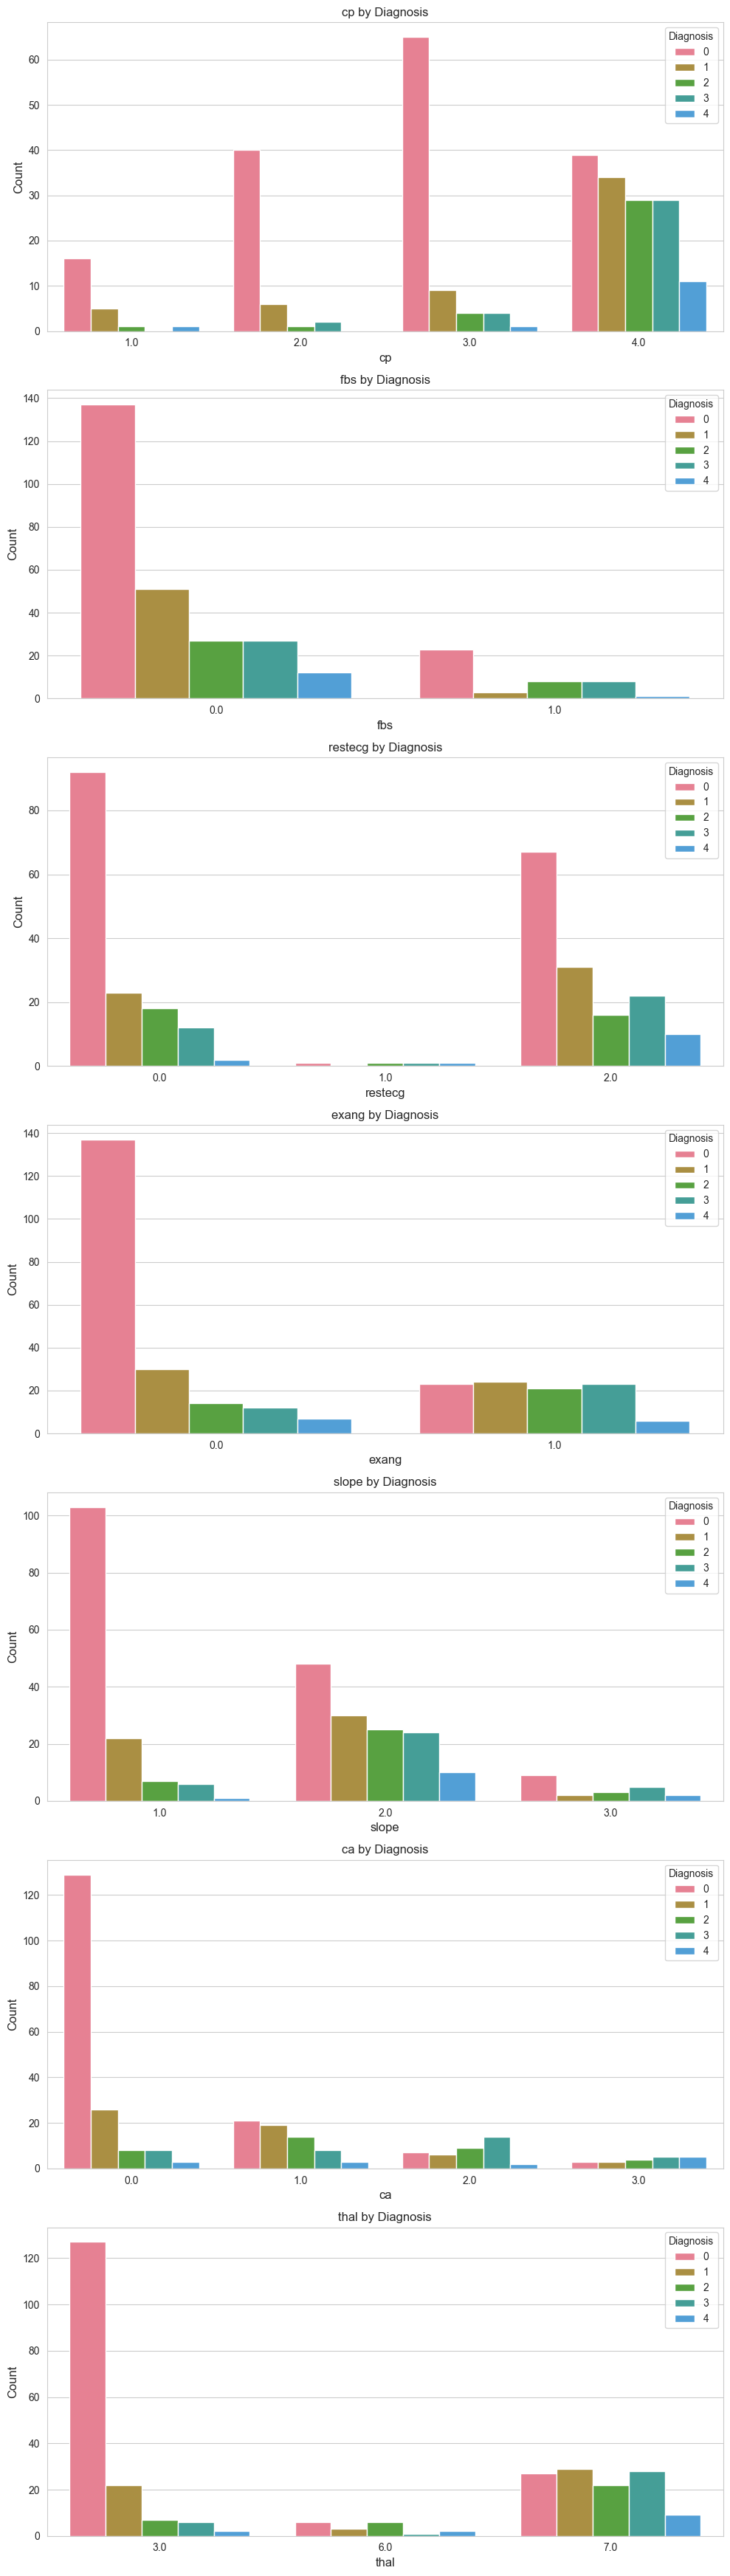

In [16]:
categotical_features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(7, 1, figsize=(10, 35))
sns.set_style('whitegrid')
pallete = sns.husl_palette(6)

for col, ax in zip(categotical_features, axes.flat):
    sns.countplot(x=col, data=data, hue='num', palette=pallete, ax=ax)
    ax.set_title(f'{col} by Diagnosis')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Diagnosis')

plt.tight_layout()
plt.show()

> - Type 4 chest pain is more frequent in higher diagnosis levels.
>
> - Higher counts of affected vessels (ca) and specific thalassemia types (thal=7) are linked with severe disease.

## 4. Building and Training the Neural Network

### 4.1 Prelimenary NN model 

1. Sequential Model:
    - A simple feedforward architecture was chosen for its suitability for tabular data, where inputs flow sequentially through the network without the need for complex connections.
    Layer Structure

2. nput Layer: 
    - Defined based on the number of features in the dataset (input_dim=X_train.shape[1]).
    - Hidden Layers: Two layers (16 → 8 neurons) using ReLU activation. The layer sizes were selected as a starting point to balance model capacity and computational efficiency.
    - Output Layer: Five neurons with Softmax activation to predict probabilities for each class (num=0, 1, 2, 3, 4).

3. Activation Functions
    - ReLU: Introduced non-linearity to allow the network to learn complex patterns, avoiding vanishing gradients during training.
    - Softmax: Converts logits in the output layer into probabilities for multi-class classification.

4. Loss Function
    - Categorical Crossentropy: Chosen because the target labels (num) are multi-class integers. This loss function measures the divergence between predicted and true probability distributions.

5. Optimizer
    - Adam Optimizer: Selected for its dynamic learning rate adjustment, which ensures efficient convergence across various tasks.

In [17]:
# 1. Split the data into training and testing sets
X = np.array(data.drop(['num'], axis=1))
y = np.array(data['num'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# convert target variable to one-hot-encoded format to match the shape of the output layer 
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

In [19]:
def create_model():
    # create model
    model = Sequential()
    input_dim = X_train.shape[1]
    model.add(Dense(16, input_dim=input_dim, kernel_initializer='normal', activation='relu',))
    model.add(Dense(8, kernel_initializer='normal', activation='relu',))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = adam_v2.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 405
Trainable params: 405
Non-trainable params: 0
_________________________________________________________________
None


/Users/heliamohammadi/Desktop/github/ML_Healthcare/.venv/lib/python3.12/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [20]:
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

In [21]:
# use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)


history = model.fit(
    X_train, 
    Y_train,
    epochs=100, 
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
30/30 [==============================] - 0s 497us/step - loss: 1.6376 - accuracy: 0.4473
Epoch 2/100
30/30 [==============================] - 0s 480us/step - loss: 1.5857 - accuracy: 0.5401
Epoch 3/100
30/30 [==============================] - 0s 438us/step - loss: 1.5704 - accuracy: 0.5401
Epoch 4/100
30/30 [==============================] - 0s 436us/step - loss: 1.5559 - accuracy: 0.5401
Epoch 5/100
30/30 [==============================] - 0s 421us/step - loss: 1.5416 - accuracy: 0.5401
Epoch 6/100
30/30 [==============================] - 0s 422us/step - loss: 1.5281 - accuracy: 0.5401
Epoch 7/100
30/30 [==============================] - 0s 417us/step - loss: 1.5151 - accuracy: 0.5401
Epoch 8/100
30/30 [==============================] - 0s 410us/step - loss: 1.5025 - accuracy: 0.5401
Epoch 9/100
30/30 [==============================] - 0s 417us/step - loss: 1.4907 - accuracy: 0.5401
Epoch 10/100
30/30 [==============================] - 0s 399us/step - loss: 1.4790 - accura

In [22]:
# Evaluate model performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.2976
Test Accuracy: 0.5333


In [24]:
from sklearn.metrics import classification_report

# Predict probabilities for test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)


# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), y_pred, target_names=['0', '1', '2', '3', '4'])
print(report)


              precision    recall  f1-score   support

           0       0.53      1.00      0.70        32
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.53        60
   macro avg       0.11      0.20      0.14        60
weighted avg       0.28      0.53      0.37        60



/Users/heliamohammadi/Desktop/github/ML_Healthcare/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/heliamohammadi/Desktop/github/ML_Healthcare/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/heliamohammadi/Desktop/github/ML_Healthcare/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

> - Achieved an accuracy of 53%, with performance skewed heavily toward the No Disease (class 0) category.
>
> - Precision, recall, and F1 are very low (0.11, 0.20, 0.14), showing that the model struggles with imbalanced data.

### 4.2 Refining the NN model

Dataset Preprocessing:
1. Handling Missing Values:
    - The preprocess_and_impute() function was developed to clean up the datasets.
    - Continuous features (trestbps, thalach, oldpeak, chol) were imputed with the median of the associated disease state (num), ensuring that the imputation respects patterns within each class.
    - Categorical features (restecg, exang, slope, thal) were imputed with the mode of the associated disease state for similar reasons.

2. Dropped Columns:
    - The fbs and ca columns were dropped due to their high missingness and low contribution to model performance, as confirmed during exploratory data analysis (EDA).

3. Dataset Combination:
    - Three datasets (Cleveland, Switzerland, Hungarian) were cleaned and combined to form a single dataset (combined_data_cleaned.csv), increasing the total sample size to 720.

Feature Engineering and Preprocessing:
1. Feature Scaling:
    - Continuous features (age, trestbps, chol, thalach, oldpeak) were normalized using StandardScaler to ensure all features contribute equally to the training process.

2. One-Hot Encoding:
- Categorical features (cp, thal, slope, exang, restecg) were one-hot encoded to make them interpretable for the model.

3. Target Grouping:
    - The target variable (num) was grouped into three classes:
        - 0: No Disease
        - 1: Low Severity (combines num=1, 2)
        - 2: High Severity (combines num=3, 4)
    - This grouping simplified the classification task and reduced noise caused by class imbalance.
    -One-hot encoding was applied to the grouped target variable for multi-class classification.


In [22]:
cleaveland_data = pd.read_csv('./data/cleaveland_data.csv')
switzerland_data = pd.read_csv('./data/switzerland_data.csv')
hungarian_data = pd.read_csv('./data/hungarian_data.csv')

In [23]:
import pandas as pd
import numpy as np

def preprocess_and_impute(df, drop_columns=None):
    """
    Preprocesses the given DataFrame by replacing '?' with NaN, dropping specified columns,
    converting all columns to numeric, and imputing missing values based on associated disease states.

    Parameters:
    - df: pandas DataFrame, the dataset to preprocess.
    - drop_columns: list of str, columns to drop from the dataset.

    Returns:
    - df: pandas DataFrame, the preprocessed and imputed dataset.
    """

    # Step 1: Replace '?' with NaN
    df = df.replace('?', np.nan)
    
    # Step 2: Drop specified columns
    if drop_columns:
        df = df.drop(columns=drop_columns)
    
    # Step 3: Convert all columns to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Step 4: Impute missing values for continuous features based on disease state
    def impute_continuous_by_disease(df, feature):
        for disease_state in df['num'].unique():  # Loop through each disease state
            median_value = df[df['num'] == disease_state][feature].median()
            df.loc[(df[feature].isnull()) & (df['num'] == disease_state), feature] = median_value
        return df
    
    # Step 5: Impute missing values for categorical features based on disease state
    def impute_categorical_by_disease(df, feature):
        for disease_state in df['num'].unique():  # Loop through each disease state
            mode_value = df[df['num'] == disease_state][feature].mode()[0]
            df.loc[(df[feature].isnull()) & (df['num'] == disease_state), feature] = mode_value
        return df

    # Identify continuous and categorical features
    continuous_features = ['trestbps', 'thalach', 'oldpeak', 'chol']
    categorical_features = ['restecg', 'exang', 'slope', 'thal']

    # Apply imputation
    for feature in continuous_features:
        df = impute_continuous_by_disease(df, feature)
    for feature in categorical_features:
        df = impute_categorical_by_disease(df, feature)

    # Step 6: Return the preprocessed and imputed DataFrame
    return df

# Columns to drop
columns_to_drop = ['fbs', 'ca']

# Preprocess and impute
cleavland_dataset_cleaned = preprocess_and_impute(cleaveland_data, drop_columns=columns_to_drop)
switzerland_dataset_cleaned = preprocess_and_impute(switzerland_data, drop_columns=columns_to_drop)
hungarian_dataset_cleaned = preprocess_and_impute(hungarian_data, drop_columns=columns_to_drop)


In [24]:
# Save cleaned datasets
cleavland_dataset_cleaned.to_csv('./data/cleaveland_data_cleaned.csv', index=False)
switzerland_dataset_cleaned.to_csv('./data/switzerland_data_cleaned.csv', index=False)
hungarian_dataset_cleaned.to_csv('./data/hungarian_data_cleaned.csv', index=False)

# Combine all datasets into one and save 
data = pd.concat([cleavland_dataset_cleaned, switzerland_dataset_cleaned, hungarian_dataset_cleaned], axis=0)
data.to_csv('./data/cardiovascular_disease_dataset_combined.csv', index=False)

In [25]:
# Normlize and encode the data for training
data = pd.read_csv('./data/combined_data_cleaned.csv')

# Identifying columns
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'thal', 'slope', 'exang', 'restecg']

scaler = StandardScaler()

# Encoding categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid collinearity with 'drop'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, continuous_features),
        ('cat', encoder, categorical_features)
    ]
)

X_processed = np.array(preprocessor.fit_transform(data.drop(columns='num')))  # Dropping the target column

y = np.array(data['num'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Group target variable and one-hot encode in one step
y_train_one_hot = to_categorical(
    np.select([y_train == 0, (y_train == 1) | (y_train == 2), (y_train == 3) | (y_train == 4)], [0, 1, 2]), 
    num_classes=3
)

y_test_one_hot = to_categorical(
    np.select([y_test == 0, (y_test == 1) | (y_test == 2), (y_test == 3) | (y_test == 4)], [0, 1, 2]), 
    num_classes=3
)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [27]:
def create_model():
    # create model
    model = Sequential()
    input_dim = X_train.shape[1]
    
    # L2 regularization (l2=0.001)  applied to the hidden layers to prevent overfitting by penalizing large weights.
    model.add(Dense(16, input_dim=input_dim, kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(8, kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    adam = adam_v2.Adam(lr=0.005)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

grouped_model = create_model()

print(grouped_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________
None


/Users/heliamohammadi/Desktop/github/ML_Healthcare/.venv/lib/python3.12/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
history = grouped_model.fit(
    X_train, 
    y_train_one_hot,
    validation_split=0.2,
    epochs=100, 
    batch_size=10,
    verbose=1
)

Epoch 1/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9427 - accuracy: 0.6413 - val_loss: 0.7205 - val_accuracy: 0.7414
Epoch 2/100
46/46 [==============================] - 0s 844us/step - loss: 0.6741 - accuracy: 0.7565 - val_loss: 0.6171 - val_accuracy: 0.7586
Epoch 3/100
46/46 [==============================] - 0s 790us/step - loss: 0.6086 - accuracy: 0.7522 - val_loss: 0.6126 - val_accuracy: 0.7500
Epoch 4/100
46/46 [==============================] - 0s 786us/step - loss: 0.5901 - accuracy: 0.7630 - val_loss: 0.5887 - val_accuracy: 0.7586
Epoch 5/100
46/46 [==============================] - 0s 796us/step - loss: 0.5576 - accuracy: 0.7717 - val_loss: 0.5699 - val_accuracy: 0.7586
Epoch 6/100
46/46 [==============================] - 0s 803us/step - loss: 0.5461 - accuracy: 0.7804 - val_loss: 0.5714 - val_accuracy: 0.7672
Epoch 7/100
46/46 [==============================] - 0s 824us/step - loss: 0.5385 - accuracy: 0.7826 - val_loss: 0.5581 - val_accuracy: 0.7500
E

In [29]:
# Evaluate model performance on the test set
test_loss, test_accuracy = grouped_model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.9281
Test Accuracy: 0.7986


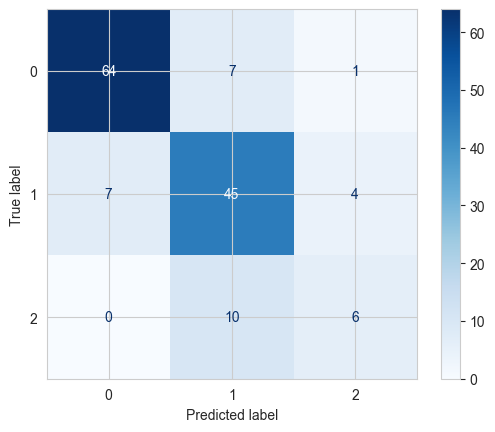

In [30]:
import numpy as np

# Predict probabilities for test set
y_pred_prob = grouped_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')


In [31]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(np.argmax(y_test_one_hot, axis=1), y_pred, target_names=['No Disease', 'Low Severity', 'High Severity'])
print(report)


               precision    recall  f1-score   support

   No Disease       0.90      0.89      0.90        72
 Low Severity       0.73      0.80      0.76        56
High Severity       0.55      0.38      0.44        16

     accuracy                           0.80       144
    macro avg       0.72      0.69      0.70       144
 weighted avg       0.79      0.80      0.79       144



> - Accuracy increased from 53% to 80%, with significant improvements for all classes.
